In [1]:
#PR5B: XGBOOST FOR REGRESSION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('housing.csv')

In [3]:
print("No. of rows & cols:", data.shape)
print("\nColumns:", data.columns)

No. of rows & cols: (20640, 10)

Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

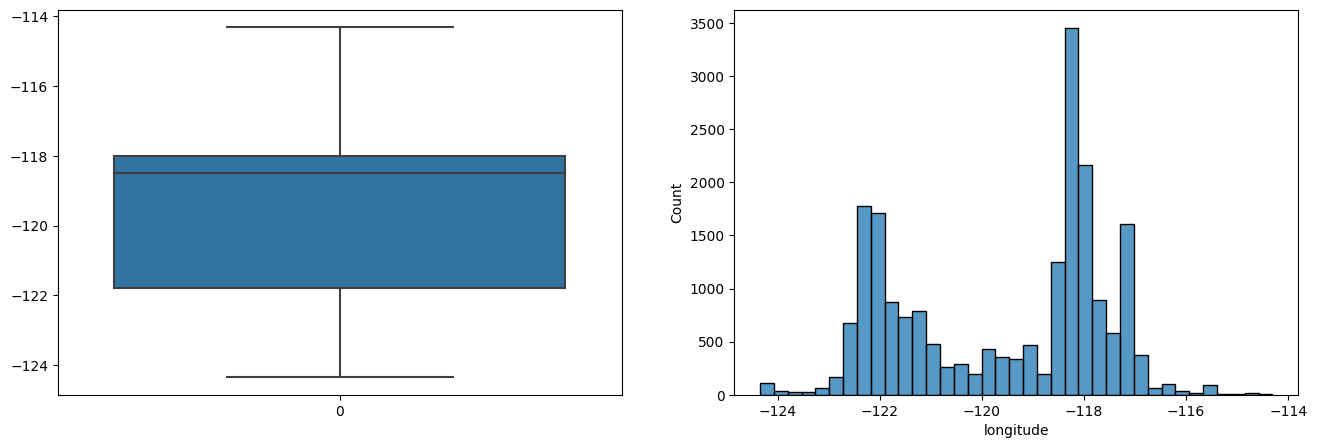

In [11]:
#Outlier Detection Using Box plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['longitude'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['longitude'])

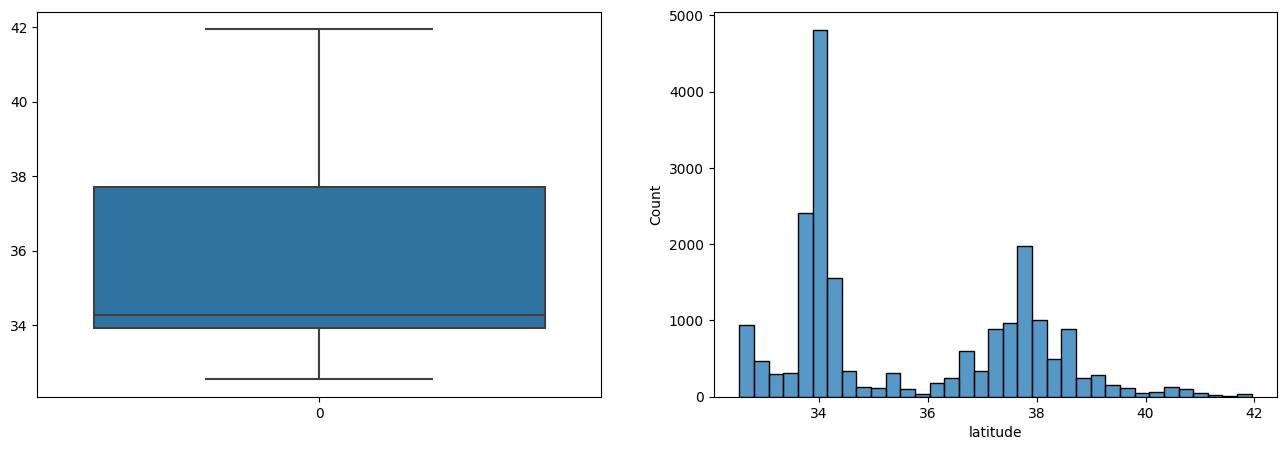

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['latitude'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['latitude'])

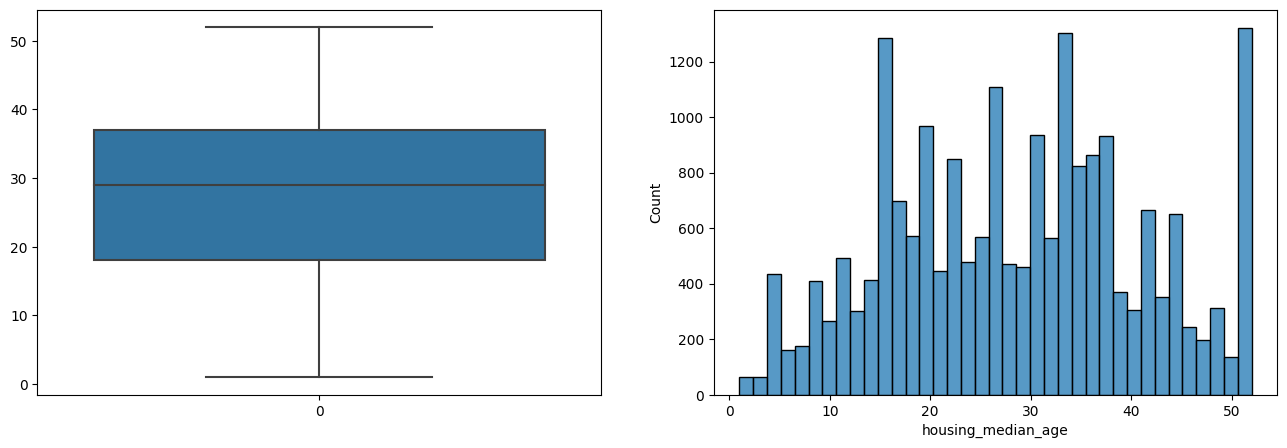

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['housing_median_age'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['housing_median_age'])

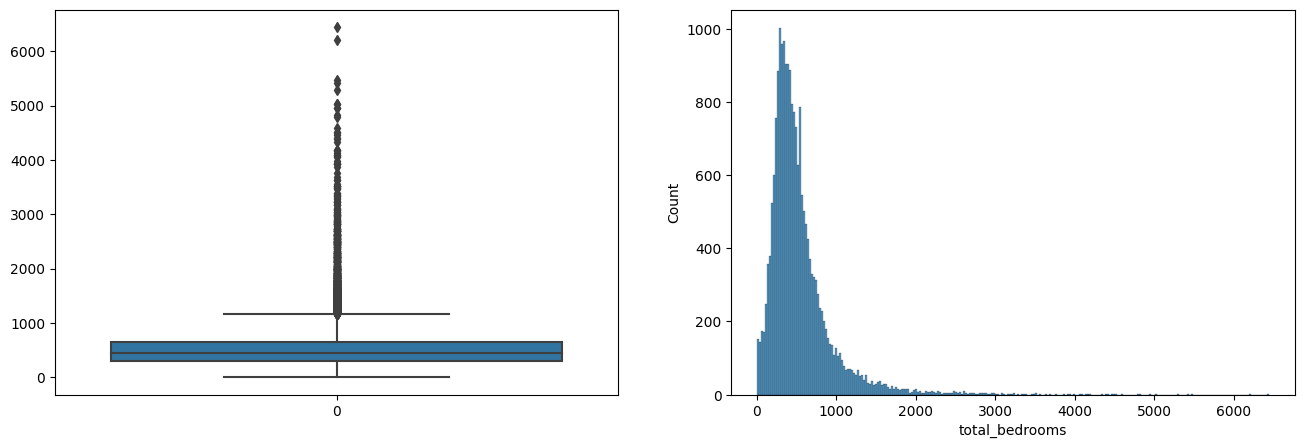

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['total_bedrooms'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['total_bedrooms'])

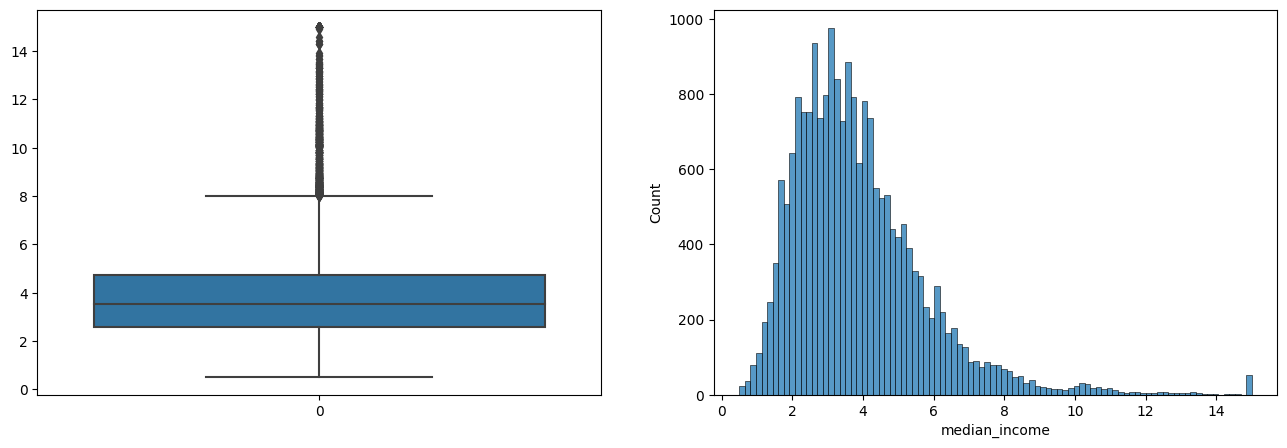

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['median_income'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['median_income'])

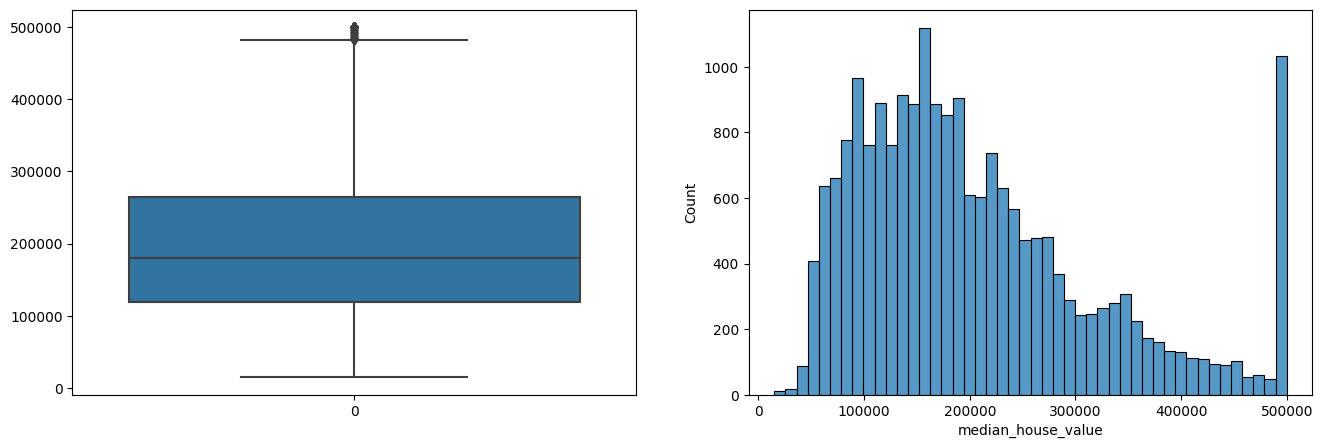

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['median_house_value'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['median_house_value'])

In [17]:
#remove outliers
def outliersTreatment(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    
    UB = Q1 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    
    df = df[(df[col] <= UB) & (df[col] >= LB)]
    
    plt.figure(figsize=(16, 5))
    sns.boxplot(x = df[col])
    plt.show()

    global data
    data = df

Q1: 2.5633999999999997
Q3: 4.74325
IQR: 2.17985


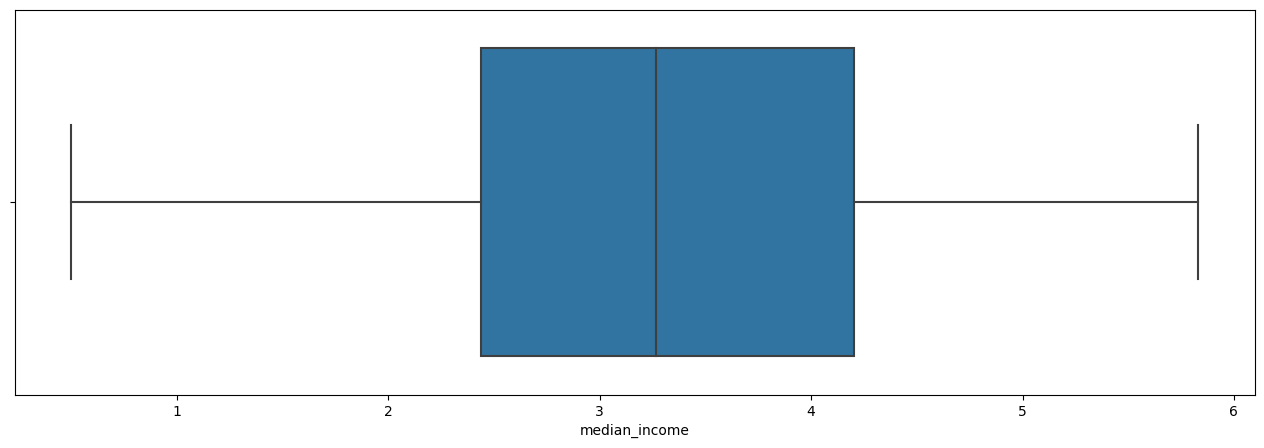

Q1: 112500.0
Q3: 230075.0
IQR: 117575.0


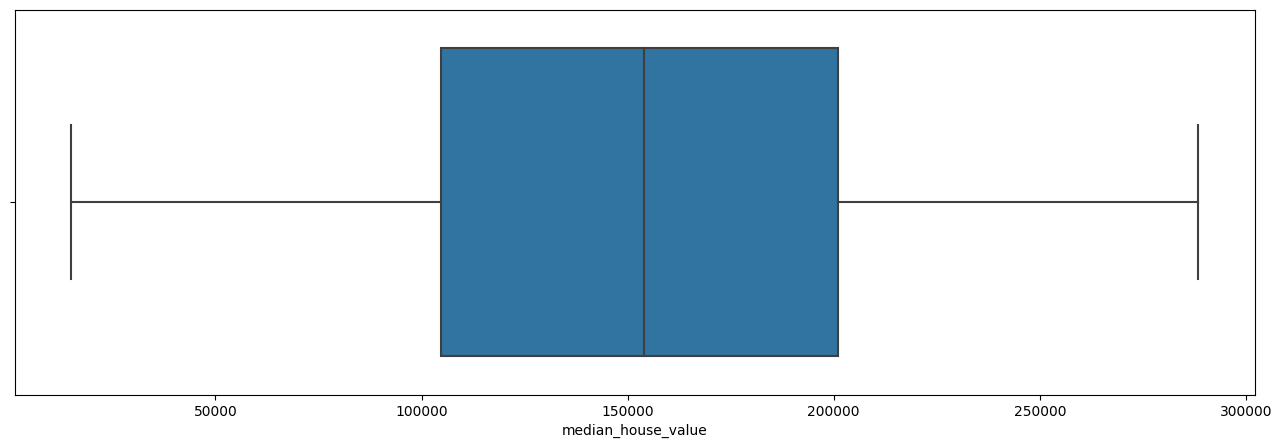

In [18]:
outliersTreatment(data, 'median_income')
outliersTreatment(data, 'median_house_value')

In [19]:
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

In [20]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,False,False,True,False
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,False,False,True,False
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,False,False,True,False
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,False,False,True,False


In [21]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']

In [22]:
data = data.drop(columns=['total_bedrooms', 'total_rooms'])

In [23]:
x = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(12647, 12) (3162, 12)
(12647,) (3162,)


In [25]:
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = xg.predict(x_test)
y_pred

array([222633.17 , 128911.164, 243291.14 , ..., 193390.8  ,  53576.484,
       117905.62 ], dtype=float32)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2_SCORE: {r2_score(y_test, y_pred):.2f}")

MSE: 833659384.81
R2_SCORE: 0.78


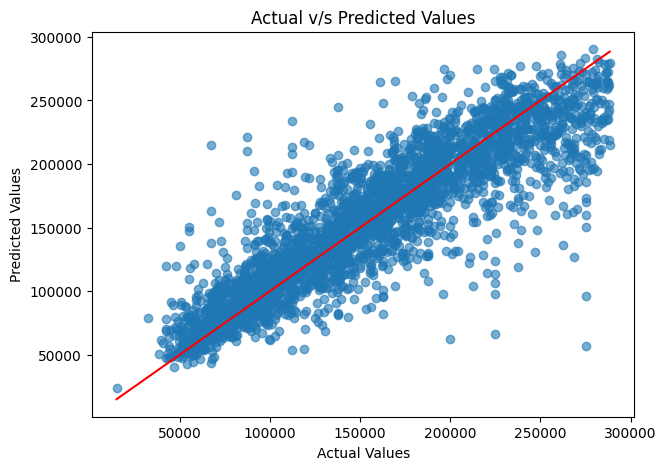

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual v/s Predicted Values")
plt.show()

In [29]:
#analyzing feature importance
import numpy as np

features = x.columns
feature_importance = xg.feature_importances_

coeff_df = pd.DataFrame({"Features": features, "Importance": feature_importance})
coeff_df['Absol_importance'] = np.abs(coeff_df['Importance'])
coeff_df = coeff_df.sort_values(by="Absol_importance", ascending=False)
coeff_df

,Features,Importance,Absol_importance
6,ocean_proximity_INLAND,0.862130,0.862130
5,median_income,0.050235,0.050235
1,latitude,0.016000,0.016000
11,population_per_household,0.015017,0.015017
0,longitude,0.014289,0.014289
9,ocean_proximity_NEAR OCEAN,0.013277,0.013277
8,ocean_proximity_NEAR BAY,0.007165,0.007165
10,rooms_per_household,0.006602,0.006602
4,households,0.006127,0.006127
2,housing_median_age,0.005182,0.005182


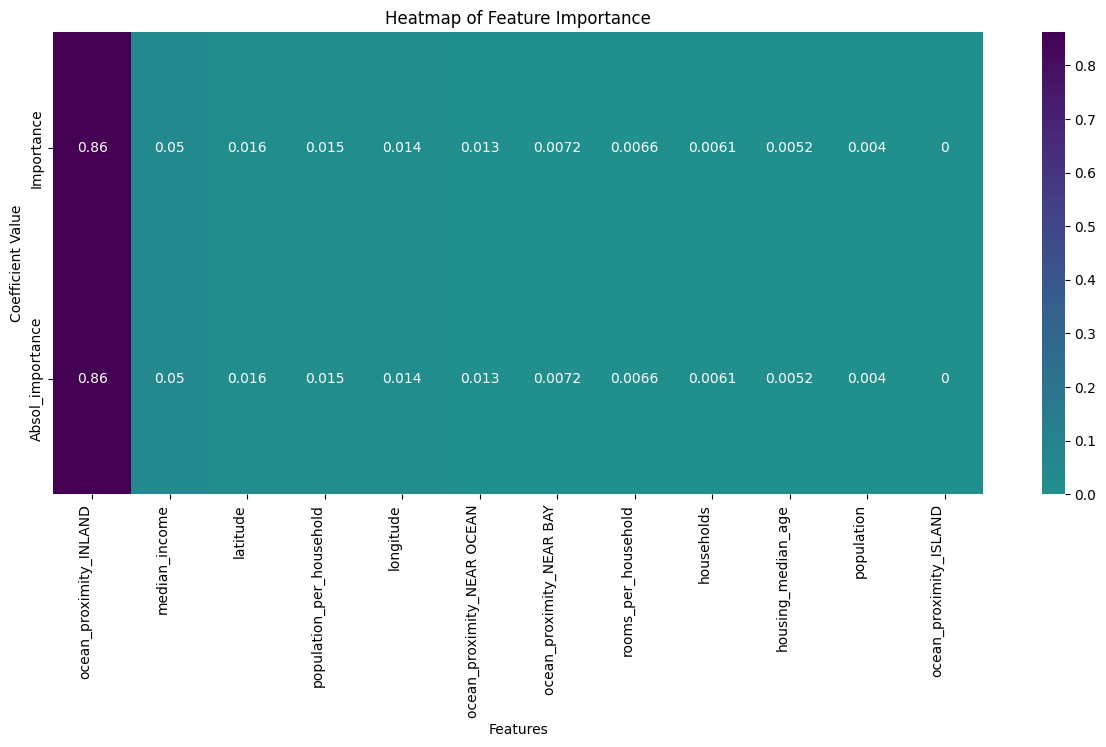

In [30]:
heatmap_data = coeff_df.set_index('Features').T  # Transpose to get features on x-axis

plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis_r', center=0, cbar=True)
plt.title('Heatmap of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90, ha='right')
plt.show()

In [31]:
#Analysis and Interpretation
#Strengths: The XGBoost Regressor captured most variance in the data, showing strong predictive performance with a high R-squared.
#Weaknesses: The model may struggle with extrapolation beyond the training data range, limiting generalization.
#Improvements recommended: Grid search can be used to hyperparameter tuning, and additional features (like feature engineering) and apply cross-validation for robustness.